In [585]:
import pandas as pd

# CSV 파일 불러오기
file_path = 'wine_review.csv'
df = pd.read_csv(file_path)

# 데이터 프레임을 표로 출력
df.head()  

,id,asins,brand,categories,dateAdded,dateUpdated,descriptions,dimension,ean,flavors,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,sourceURLs,upc,weight
0,AV13ClKCGV-KLJ3akN68,NaN,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:11Z,2018-01-10T18:06:28Z,NaN,1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This a fantastic white wine for any occasion!,My Favorite White Wine,NaN,NaN,Bjh,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,4.9213E+11,1.0 lbs
1,AV13CsvW-jtxr-f38AQO,NaN,Fresh Craft Co.,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:42Z,2018-01-10T05:38:33Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",4.25 in x 4.25 in x 5.25 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,"Tart, not sweet...very refreshing and delicious!",Yum!!,NaN,NaN,Wino,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,83120003441,2.45 lbs
2,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,I was given this wine so it was a delightful s...,A New Favorite!,NaN,NaN,Bama Mom,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
3,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This is a phenomenal wine and my new favorite ...,"Bold, Flavorful, Aromatic, Delicious",NaN,NaN,Av Dub,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
4,AV13CYL4-jtxr-f37_-t,NaN,Wine Cube153,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:18Z,2018-01-10T18:06:29Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,4 750ml bottles for the price of two With way ...,"Yum! Plus, Environmentally Friendly!",Overland Park,NaN,Chelseamay,NaN,https://redsky.target.com/groot-domain-api/v1/...,85200600465,1.0 lbs


In [586]:
# 결측값 제거
df.dropna(subset=['reviews.text'], inplace=True)

In [587]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# 불용어 리스트 가져오기
print(stopwords.words('english'))

# NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('stopwords')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [588]:
# 텍스트 전처리 함수 정의 
stemmer = PorterStemmer()


#불용어 제거, 텍스트 토큰화, 어간 추출, 리스트 문자열로 변환
def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    preprocessed_text = ' '.join(stemmed_tokens)
    return preprocessed_text

In [589]:
# 리뷰 텍스트 전처리
df['cleaned_text'] = df['reviews.text'].apply(preprocess_text)

In [590]:
from nltk.stem import PorterStemmer

# 스테머 초기화
stemmer = PorterStemmer()

# 스테밍 함수
def stem_words(words):
    return [stemmer.stem(word) for word in words]

# 예시 적용
data_cleaned['stemmed_tokens'] = data_cleaned['tokens'].apply(stem_words)

In [591]:
# 데이터 일부 확인
print(data_cleaned[['reviews.text', 'tokens', 'stemmed_tokens']].head())

                                        reviews.text  \
0      This a fantastic white wine for any occasion!   
1   Tart, not sweet...very refreshing and delicious!   
2  I was given this wine so it was a delightful s...   
3  This is a phenomenal wine and my new favorite ...   
4  4 750ml bottles for the price of two With way ...   

                                              tokens  \
0              [fantastic, white, wine, occasion, !]   
1    [Tart, ,, sweet, ..., refreshing, delicious, !]   
2  [given, wine, delightful, surprise, find, flav...   
3          [phenomenal, wine, new, favorite, red, .]   
4  [4, 750ml, bottles, price, two, way, less, pac...   

                                      stemmed_tokens  
0                   [fantast, white, wine, occas, !]  
1          [tart, ,, sweet, ..., refresh, delici, !]  
2  [given, wine, delight, surpris, find, flavor, ...  
3             [phenomen, wine, new, favorit, red, .]  
4  [4, 750ml, bottl, price, two, way, less, packa..

In [592]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# VADER 감정 분석기 초기화
vader_sentiment = SentimentIntensityAnalyzer()

In [593]:
# VADER 감정 분석기를 사용하여 감정 점수 계산
def calc_sentiment(review):    
    return vader_sentiment.polarity_scores(review)["compound"]  

In [594]:
# 데이터 타입 변환
df['reviews.text'] = df['reviews.text'].astype(str)

In [595]:
# 부정적 감정과 긍정적 감정 열 추가
print("Calculating sentiment columns for both positive and negative reviews")

Calculating sentiment columns for both positive and negative reviews


In [596]:
# 감정 분석 계산 및 데이터프레임 정렬
df["Review_Sentiment"] = df["reviews.text"].astype(str).apply(calc_sentiment)
df_sorted = df.sort_values(by="Review_Sentiment", ascending=True)


print(df_sorted[["reviews.text", "Review_Sentiment"]])

                                           reviews.text  Review_Sentiment
2804  Bought the wine for my son for a Christmas pre...           -0.9311
222   It's not often that you come across a wine thi...           -0.9098
1440  First, let's establish that the whole point of...           -0.9062
2523  I know people claim that Carmex is addictive, ...           -0.9047
2380  this little jar's contents are the item to go ...           -0.9042
...                                                 ...               ...
646   I haven't had a chance to brew this beer, but ...            0.9956
642   I haven't had a chance to brew this beer, but ...            0.9956
652   I haven't had a chance to brew this beer, but ...            0.9956
653   I haven't had a chance to brew this beer, but ...            0.9956
1124  Do you love margaritas They are among the most...            0.9985

[2889 rows x 2 columns]


In [597]:
from sklearn.model_selection import train_test_split

# 리뷰와 평점 선택
df = df[['reviews.text', 'reviews.rating']]  

# 결측값 처리
df.dropna(inplace=True)

# 데이터셋 분할: 학습 세트와 테스트 세트
X = df['reviews.text']  
y = df['reviews.rating'] 

# train_test_split을 사용하여 데이터셋 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [598]:
# 분할 결과 출력
print("학습 세트 크기:", len(x_train))
print("테스트 세트 크기:", len(x_test))

학습 세트 크기: 1955
테스트 세트 크기: 489


In [599]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# TF-IDF 벡터화 및 분류 모델 파이프라인 설정
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])

In [600]:
# 탐색할 하이퍼파라미터 설정
parameters = {
    'tfidf__max_features': [1000, 2000, 5000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1.0, 10.0]
}

In [601]:
from sklearn.model_selection import GridSearchCV, train_test_split
# 그리드 서치 사용 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 1.0, 10.0],
                         'tfidf__max_features': [1000, 2000, 5000],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             verbose=1)

In [602]:
# 최적의 모델 및 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

최적의 하이퍼파라미터: {'clf__C': 1.0, 'tfidf__max_features': 1000, 'tfidf__ngram_range': (1, 1)}


In [603]:
from sklearn.model_selection import cross_val_score
# K-fold 교차 검증을 사용하여 모델 평가
k = 5  
scores = cross_val_score(pipeline, x_train, y_train, cv=k, scoring='accuracy')

In [604]:
# 교차 검증 결과 출력
print(f'K-fold 교차 검증 평균 정확도: {scores.mean():.4f} (+/- {scores.std():.4f})')

K-fold 교차 검증 평균 정확도: 0.8348 (+/- 0.0035)


In [605]:
from sklearn.metrics import classification_report

# 정밀도 F1 점수 확인
y_pred = grid_search.predict(x_test)
print(classification_report(y_test, y_pred, zero_division=0))
classes = [str(i) for i in range(1, 11)]


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        13
         2.0       0.00      0.00      0.00         6
         3.0       0.00      0.00      0.00         5
         4.0       0.50      0.05      0.08        44
         5.0       0.87      1.00      0.93       421

    accuracy                           0.86       489
   macro avg       0.27      0.21      0.20       489
weighted avg       0.79      0.86      0.81       489



오버피팅이란 지나치게 많은 학습데이터를 학습시켜 학습 데이터에는 맞고 테스트 데이터에는 맞지 않는 것을 말한다.
언더피팅은 학습 데이터량이 부족해 충분한 학습을 하지 못하고 테스트 데이터로 예측하지 못하는 것을 말한다.

이를 해결하기 위해서는 표준화, 정규화로 값의 분산을 줄인다.

다음은 표준화, 정규화하는 코드이다.

scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(X_tfidf.toarray())


scaler_minmax = MinMaxScaler()
X_normalized = scaler_minmax.fit_transform(X_tfidf.toarray())

In [606]:
from sklearn.metrics import precision_score, f1_score


# 예측 결과 평가 
precision = precision_score(y_test, y_pred, average=None, zero_division=0)
f1_scores = f1_score(y_test, y_pred, average=None, zero_division=0)


In [607]:
from sklearn.metrics import confusion_matrix

# 테스트 세트에 대한 예측 수행
y_pred = grid_search.predict(x_test)

# 혼동 행렬 생성
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[  0   0   0   0  13]
 [  0   0   0   1   5]
 [  0   0   0   0   5]
 [  0   0   0   2  42]
 [  0   0   0   1 420]]


In [608]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# VADER 감정 분석기 초기화
vader_sentiment = SentimentIntensityAnalyzer()

# 감정 분석 계산 및 'Review_Sentiment' 열에 추가
df['Review_Sentiment'] = df['reviews.text'].apply(lambda x: vader_sentiment.polarity_scores(str(x))['compound'])

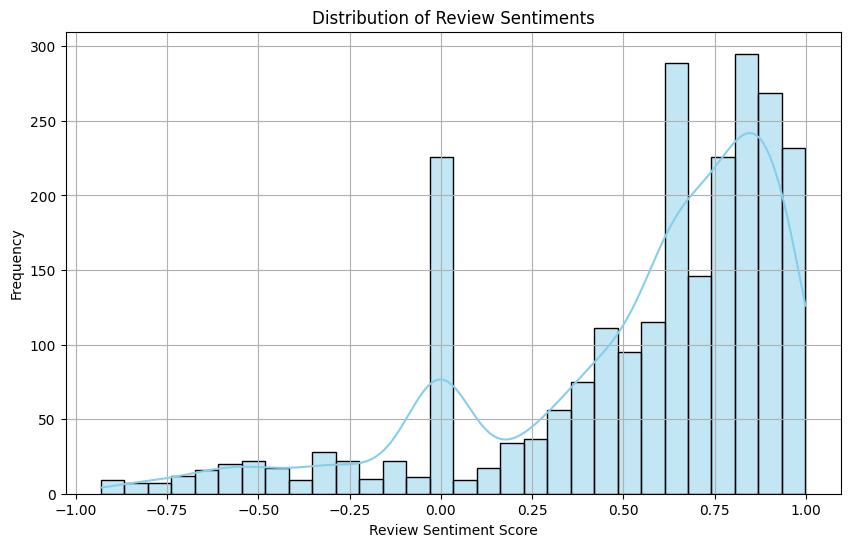

In [609]:
import seaborn as sns
import matplotlib.pyplot as plt

# 리뷰 감정 점수 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df["Review_Sentiment"], bins=30, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Review Sentiments')
plt.xlabel('Review Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [610]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# TF-IDF 벡터화 및 분류 모델 파이프라인 설정
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),  # TF-IDF 벡터화 설정 추가
    ('clf', LogisticRegression(max_iter=1000))
])

# 학습 데이터를 사용하여 파이프라인 학습
pipeline.fit(x_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = pipeline.predict(x_test)


In [611]:
from sklearn.metrics import confusion_matrix

# 테스트 세트에 대한 예측 수행
y_pred = grid_search.predict(x_test)

# 혼동 행렬 생성
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[  0   0   0   0  13]
 [  0   0   0   1   5]
 [  0   0   0   0   5]
 [  0   0   0   2  42]
 [  0   0   0   1 420]]


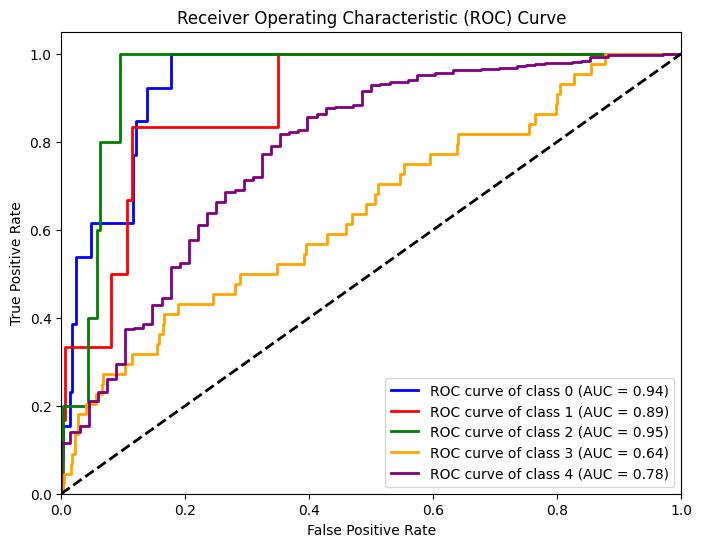

In [612]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle

# 예측 확률 계산 (일대다 방식)
y_prob = grid_search.predict_proba(x_test)

# 클래스를 이진화 (각 클래스에 대해 이진 분류)
y_test_bin = label_binarize(y_test, classes=grid_search.classes_)

# ROC 곡선 계산 및 시각화
plt.figure(figsize=(8, 6))
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(grid_search.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# 모든 ROC 곡선을 그리기 위해 색상 순환
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])  # 적절히 색상을 추가할 수 있습니다.

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
